In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('FinalProjectData/Study_A.csv')
df2 = pd.read_csv('FinalProjectData/Study_B.csv')
df3 = pd.read_csv('FinalProjectData/Study_C.csv')
df4 = pd.read_csv('FinalProjectData/Study_D.csv')

In [3]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,Study,Country,PatientID,SiteID,RaterID,AssessmentID,TxGroup,VisitDay,P1,P2,...,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,A,USA,10001,20035,30076,100679,Control,0,5,5,...,5,3,3,4,3,3,3,5,107,Assign to CS
1,A,USA,10001,20035,30076,101017,Control,11,5,5,...,5,3,3,4,3,3,3,5,109,Assign to CS
2,A,USA,10001,20035,30076,102177,Control,18,4,4,...,4,2,2,3,3,2,3,4,91,Passed
3,A,USA,10001,20035,30076,101533,Control,25,3,3,...,3,2,2,3,3,2,3,4,80,Flagged
4,A,USA,10001,20035,30076,100930,Control,39,3,3,...,3,2,2,3,3,2,3,4,77,Flagged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20942,D,China,40223,80001,120013,400496,Treatment,17,4,3,...,3,1,3,5,2,2,4,4,79,Flagged
20943,D,China,40223,80001,120013,402261,Treatment,21,4,3,...,3,1,2,4,2,2,3,3,71,Flagged
20944,D,China,40223,80001,120013,400605,Treatment,28,4,3,...,2,1,3,4,2,2,3,3,74,Flagged
20945,D,China,40223,80001,120013,402460,Treatment,42,4,3,...,3,1,3,5,2,2,4,3,77,Flagged


In [5]:
df['Country'].value_counts()

China             5960
USA               4155
Russia            2733
Japan             1800
Ukraine           1073
Czech Republic     762
Poland             612
Hungary            427
Spain              392
India              321
Slovakia           299
Argentina          279
Bulgaria           278
Portugal           245
Romania            239
Korea              187
Taiwan             182
Belgium            180
Germany            164
Mexico             149
Brazil             134
Canada             114
Greece              97
Australia           75
France              46
ERROR               18
Austria             16
Sweden              10
Name: Country, dtype: int64

In [7]:
df.columns

Index(['Study', 'Country', 'PatientID', 'SiteID', 'RaterID', 'AssessmentID',
       'TxGroup', 'VisitDay', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'N1',
       'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6',
       'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16',
       'PANSS_Total', 'LeadStatus'],
      dtype='object')

In [6]:
df['VisitDay'].describe()

count    20947.000000
mean        92.392085
std         95.033820
min          0.000000
25%         15.000000
50%         67.000000
75%        133.000000
max        480.000000
Name: VisitDay, dtype: float64

In [8]:
# add three new columns to the dataframe to indicate the total of P1 to P7, the total of N1 to N7, and the total of G1 to G16
df['P_Total'] = df['P1'] + df['P2'] + df['P3'] + df['P4'] + df['P5'] + df['P6'] + df['P7']
df['N_Total'] = df['N1'] + df['N2'] + df['N3'] + df['N4'] + df['N5'] + df['N6'] + df['N7']
df['G_Total'] = df['G1'] + df['G2'] + df['G3'] + df['G4'] + df['G5'] + df['G6'] + df['G7'] + df['G8'] + df['G9'] + df['G10'] + df['G11'] + df['G12'] + df['G13'] + df['G14'] + df['G15'] + df['G16']

In [16]:
df.drop(columns = ['Study', 'Country', 'SiteID', 'RaterID', 'AssessmentID'], inplace = True)

In [17]:
df

,PatientID,TxGroup,VisitDay,P1,P2,P3,P4,P5,P6,P7,...,G13,G14,G15,G16,PANSS_Total,LeadStatus,P_Total,N_Total,G_Total,Cluster
0,10001,Control,0,5,5,5,3,4,5,3,...,3,3,3,5,107,Assign to CS,30,24,53,4
1,10001,Control,11,5,5,5,3,4,5,3,...,3,3,3,5,109,Assign to CS,30,25,54,4
2,10001,Control,18,4,4,4,3,2,4,2,...,3,2,3,4,91,Passed,23,24,44,3
3,10001,Control,25,3,3,3,2,2,4,2,...,3,2,3,4,80,Flagged,19,22,39,1
4,10001,Control,39,3,3,4,2,1,4,2,...,3,2,3,4,77,Flagged,19,21,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20942,40223,Treatment,17,4,3,4,1,1,3,2,...,2,2,4,4,79,Flagged,18,21,40,1
20943,40223,Treatment,21,4,3,4,2,1,2,2,...,2,2,3,3,71,Flagged,18,18,35,0
20944,40223,Treatment,28,4,3,4,2,2,2,2,...,2,2,3,3,74,Flagged,19,19,36,0
20945,40223,Treatment,42,4,3,4,1,2,3,2,...,2,2,4,3,77,Flagged,19,20,38,0


In [19]:
df = df[['PatientID', 'TxGroup', 'VisitDay', 'PANSS_Total', 'LeadStatus', 'P_Total', 'N_Total', 'G_Total']]
df

,PatientID,TxGroup,VisitDay,PANSS_Total,LeadStatus,P_Total,N_Total,G_Total
0,10001,Control,0,107,Assign to CS,30,24,53
1,10001,Control,11,109,Assign to CS,30,25,54
2,10001,Control,18,91,Passed,23,24,44
3,10001,Control,25,80,Flagged,19,22,39
4,10001,Control,39,77,Flagged,19,21,37
...,...,...,...,...,...,...,...,...
20942,40223,Treatment,17,79,Flagged,18,21,40
20943,40223,Treatment,21,71,Flagged,18,18,35
20944,40223,Treatment,28,74,Flagged,19,19,36
20945,40223,Treatment,42,77,Flagged,19,20,38


In [21]:
# select all PatientID that have VisitDay = 0
df_0 = df[df['VisitDay'] == 0]
df_0

,PatientID,TxGroup,VisitDay,PANSS_Total,LeadStatus,P_Total,N_Total,G_Total
0,10001,Control,0,107,Assign to CS,30,24,53
7,10002,Control,0,85,Passed,26,19,40
10,10003,Treatment,0,97,Flagged,29,23,45
16,10004,Control,0,95,Passed,26,27,42
24,10005,Control,0,98,Passed,26,24,48
...,...,...,...,...,...,...,...,...
20889,40219,Control,0,96,Assign to CS,29,21,46
20897,40220,Treatment,0,94,Assign to CS,22,24,48
20914,40221,Treatment,0,82,Assign to CS,20,24,38
20931,40222,Control,0,80,Passed,24,15,41


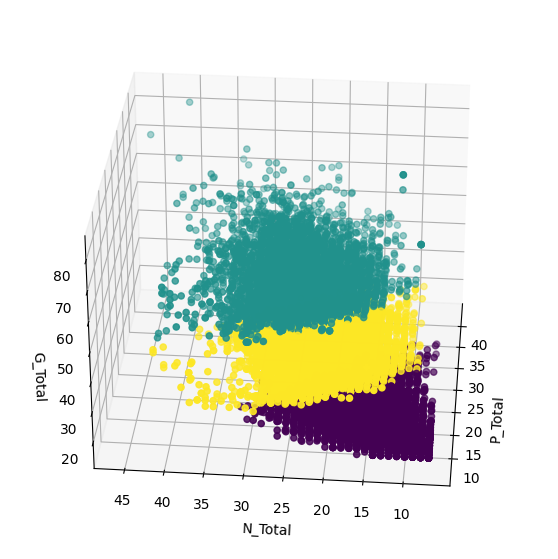

In [51]:
# Use K-means clustering to cluster the data into 3 clusters by using the P_Total, N_Total, and G_Total columns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['P_Total', 'N_Total', 'G_Total']])
df['Cluster'] = kmeans.labels_

# Plot the clusters in a 3D graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['P_Total'], df['N_Total'], df['G_Total'], c=df['Cluster'], s=20)
ax.set_xlabel('P_Total')
ax.set_ylabel('N_Total')
ax.set_zlabel('G_Total')
ax.view_init(30, 185)
plt.show()

In [24]:
# find the corelation between the clusters and the PANSS_Total column
df[['P_Total', 'N_Total', 'G_Total', 'Cluster', 'PANSS_Total']].corr()

,P_Total,N_Total,G_Total,Cluster,PANSS_Total
P_Total,1.000000,0.444636,0.788099,0.359697,0.868513
N_Total,0.444636,1.000000,0.633299,0.375869,0.760721
G_Total,0.788099,0.633299,1.000000,0.430616,0.957151
Cluster,0.359697,0.375869,0.430616,1.000000,0.448974
PANSS_Total,0.868513,0.760721,0.957151,0.448974,1.000000


In [38]:
df

,PatientID,TxGroup,VisitDay,PANSS_Total,LeadStatus,P_Total,N_Total,G_Total,Cluster
0,10001,Control,0,107,Assign to CS,30,24,53,1
1,10001,Control,11,109,Assign to CS,30,25,54,1
2,10001,Control,18,91,Passed,23,24,44,1
3,10001,Control,25,80,Flagged,19,22,39,0
4,10001,Control,39,77,Flagged,19,21,37,0
...,...,...,...,...,...,...,...,...,...
20942,40223,Treatment,17,79,Flagged,18,21,40,0
20943,40223,Treatment,21,71,Flagged,18,18,35,0
20944,40223,Treatment,28,74,Flagged,19,19,36,0
20945,40223,Treatment,42,77,Flagged,19,20,38,0


In [47]:
df.corr()

,PatientID,VisitDay,PANSS_Total,P_Total,N_Total,G_Total,Cluster
PatientID,1.000000,0.197328,-0.370638,-0.421434,-0.189355,-0.340166,0.085207
VisitDay,0.197328,1.000000,-0.608773,-0.564078,-0.425660,-0.580123,0.397263
PANSS_Total,-0.370638,-0.608773,1.000000,0.868513,0.760721,0.957151,-0.440960
P_Total,-0.421434,-0.564078,0.868513,1.000000,0.444636,0.788099,-0.347683
N_Total,-0.189355,-0.425660,0.760721,0.444636,1.000000,0.633299,-0.375196
G_Total,-0.340166,-0.580123,0.957151,0.788099,0.633299,1.000000,-0.423272
Cluster,0.085207,0.397263,-0.440960,-0.347683,-0.375196,-0.423272,1.000000


In [27]:
# calculate the number of patients in each cluster
df['Cluster'].value_counts()

1    8855
2    6728
0    5364
Name: Cluster, dtype: int64

In [35]:
df[df['G_Total'] < 20]

,PatientID,TxGroup,VisitDay,PANSS_Total,LeadStatus,P_Total,N_Total,G_Total,Cluster
39,10006,Treatment,67,47,Passed,13,15,19,0
679,10100,Control,42,42,Passed,11,12,19,0
680,10100,Control,56,40,Assign to CS,11,11,18,0
681,10100,Control,70,42,Assign to CS,11,13,18,0
1107,10159,Treatment,96,34,Assign to CS,8,8,18,0
...,...,...,...,...,...,...,...,...,...
20726,40207,Treatment,123,38,Flagged,7,13,18,0
20728,40207,Treatment,139,39,Flagged,7,14,18,0
20741,40208,Control,115,45,Flagged,10,16,19,0
20744,40208,Control,143,42,Flagged,9,15,18,0
